# Kernel PCA

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mglearn

In [102]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

In [103]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [104]:
explained_variance_ratio

array([0.53343846, 0.46656154])

In [105]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

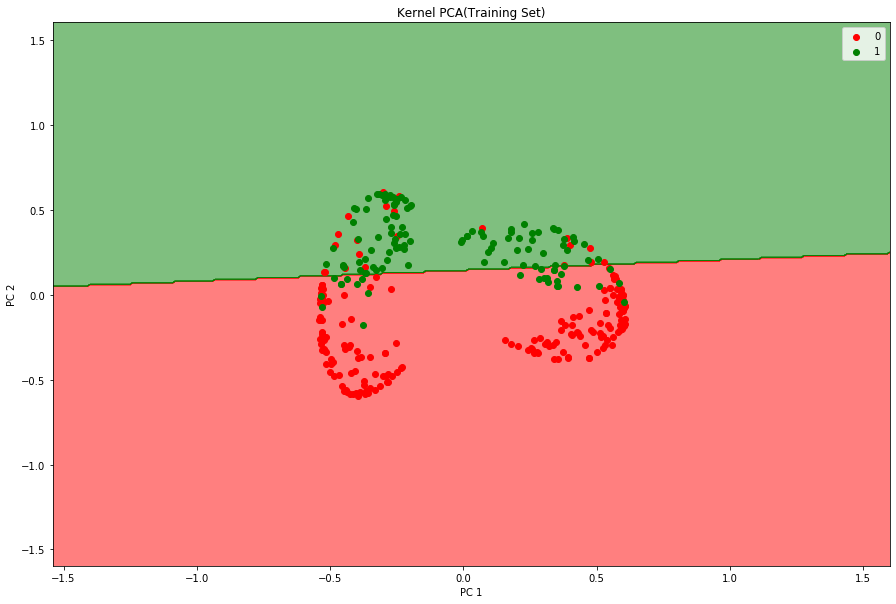

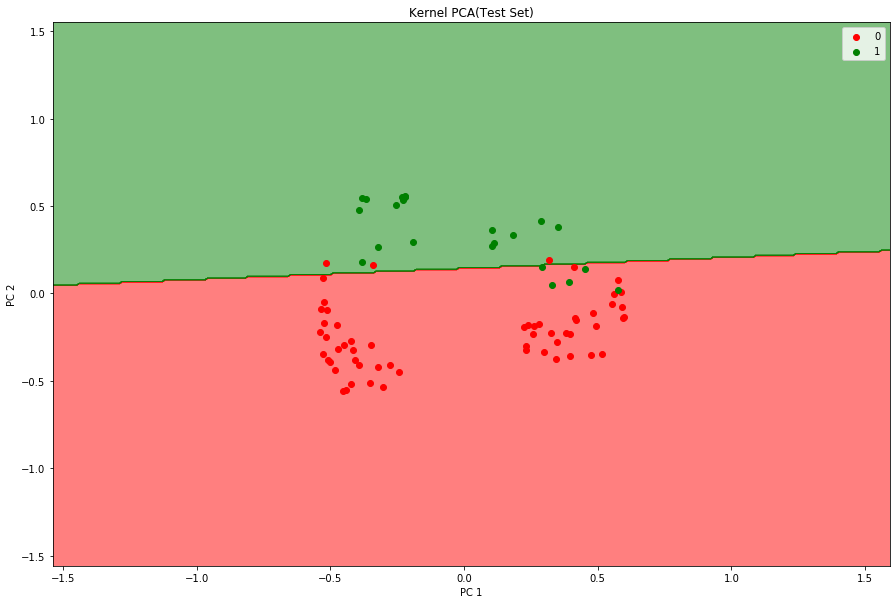

In [120]:
#Splitting data into X (features) and y (results)
X=dataset.iloc[:,[1,2,3]].values
y=dataset.iloc[:,-1].values

# Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#Applying Kernel PCA
from sklearn.decomposition import KernelPCA as PCA
PCA=PCA(n_components=2, kernel='rbf', alpha=1)
X_train = PCA.fit_transform(X_train)
X_test= PCA.transform(X_test)
explained_variance = np.var(X_train, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Visualizing the decision boundary on the training set
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_train[:,0].min() -1, stop= X_train[:,0].max() +1, step = 0.01),
                     np.arange(start= X_train[:,1].min() -1, stop= X_train[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green','blue'))(i), label=j)
    
plt.title('Kernel PCA(Training Set)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')

# Visualizing the decision boundary on the test set
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Kernel PCA(Test Set)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')

In [121]:
# #Splitting data into X (features) and y (results)
# X=dataset.iloc[:,:-1].values
# y=dataset.iloc[:,-1].values

# # Splitting training and testing
# from sklearn.model_selection import train_test_split as tts
# X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)

# from sklearn.linear_model import LogisticRegression

# classifier= LogisticRegression()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

#Visualizing the score result
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_1','MODEL_2'
                                                                      ], index = ['DATA_1','DATA_2'])


from IPython.display import HTML
s  = '<script type="text/Javascript">'
s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
s += 'win.document.body.innerHTML = \'' + df_confusion.to_html().replace("\n",'\\') + '\';'
s += '</script>'

# Show in new Window
HTML(s)

Training set score:0.850
Test set score:0.900
